In [1]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
import tensorflow

import pandas as pd
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_train_dataset.csv')
df.head(10)

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
5,5,w53495 w306061 w372126 w47982 w66980 w189406 w...,1,0,0,0,1
6,6,w237465 w256553 w286461 w382662 w206066 w12125...,1,0,0,1,0
7,7,w173317 w39222 w207614 w136665 w394246 w197783...,1,1,1,0,0
8,8,w373517 w37419 w358253 w162965 w286461 w204762...,1,0,0,0,0
9,9,w230409 w109269 w369689 w186076 w377961 w21787...,1,1,0,0,0


In [3]:
df_labels = df[["outwear", "top", "trousers", "women dresses", "women skirts"]]
df_labels.head()

,outwear,top,trousers,women dresses,women skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


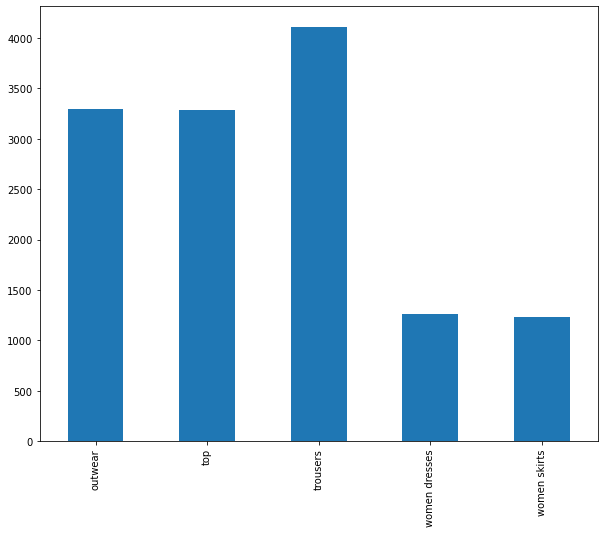

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_labels.sum(axis=0).plot.bar()

In [5]:
X = list(df["word_representation"])
y = df_labels.values
print(X[1])
print( type(X))
banlist=[]
mod_X = []
for sen in X:
    tmp = sen.split(" ")
    ans = [x for x in tmp if x not in banlist]
    mod_sen = (" ").join(ans)
    mod_X.append(mod_sen)

print(mod_X[1])
print(type(X[1]))

w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910
<class 'list'>
w195317 w127737 w171593 w22890 w342007 w217871 w289824 w500005 w85858 w241910 w194870 w192814 w127834 w263923 w241910
<class 'str'>


In [6]:
X_train, X_test, y_train, y_test = train_test_split(mod_X, y, test_size=0.20, random_state=42)
print(X_test[1])
#why fix num words
tokenizer = Tokenizer(num_words=4250)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
#what is max len
maxlen = 26
padding = 'post'
truncating = 'pre'
X_train = pad_sequences(X_train, padding=padding, maxlen=maxlen, truncating = truncating)
X_test = pad_sequences(X_test, padding=padding, maxlen=maxlen, truncating = truncating)
print(X_train[5:20])
print(type(X_train[1]))

w195317 w256553 w39218 w288320 w1867 w120979 w66980 w194870 w13069 w42169 w251935 w185379 w111248 w376672 w85858 w166407 w12685
[[  13  223    4    1  129  178  110  202   38  698  261  736  775  213
     1 1034   23  340   16  819   56 1123  357  388   29    0]
 [  51   27  318   42   11    5   53  160    3  148  205 1252  167  196
    53  332    0    0    0    0    0    0    0    0    0    0]
 [  60  278   21   69   34  143  190    8    4  155  881  809   24    7
  2091   59   23   56    0    0    0    0    0    0    0    0]
 [   2  303  117  244  383    8  600   22  156   44  675 1060  755   80
     7    3  203  123 1035  196    0    0    0    0    0    0]
 [  51  337  197   72   21   69    8   53  160    3   14  756  161  126
    19    5   53    0    0    0    0    0    0    0    0    0]
 [ 757  794  737  239   76  601   16   48   45   42 2704  128 1061   63
    11    0    0    0    0    0    0    0    0    0    0    0]
 [ 163    6  471    4  618   58  546   51    4   57   34   30 

In [7]:
print(type(X_test))
print(type(y_train))
print(X_test[1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 13  27  54 844  24   7   9   2 670 101 543 166  12 333  48 985  30   0
   0   0   0   0   0   0   0   0]


In [8]:
from numpy import array
from numpy import asarray
from numpy import zeros
import pickle

#banlist=["w34894", "w194870", "w217871", "w311583"]
embeddings_dictionary = pd.read_pickle("word_embeddings.pkl")

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
#    if word in banlist:
#        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None :
        embedding_matrix[index] = embedding_vector
print(type(embedding_matrix))
print(len(embedding_matrix))

<class 'numpy.ndarray'>
3969


In [9]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
#model.add(tensorflow.keras.Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False, input_shape=(maxlen,)))
model.add(Bidirectional(LSTM(132, return_sequences=False),merge_mode="concat"))
model.add(Dropout(0.2))
# model.add(Dense(units=50))
model.add(Dense(units=5))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [10]:
print(model.summary())
print(type(X_test))
print(len(X_test[1]))
print(len(X))
print(X_test[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 100)           396900    
_________________________________________________________________
bidirectional (Bidirectional (None, 264)               246048    
_________________________________________________________________
dropout (Dropout)            (None, 264)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1325      
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
Total params: 644,273
Trainable params: 247,373
Non-trainable params: 396,900
_________________________________________________________________
None
<class 'numpy.ndarray'>
26
7380
[ 13  27  54 844  24   7   9   2 670 101 543 166  12 333  48 985  30   0


In [11]:
history = model.fit(X_train, y_train, batch_size=160, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
36/36 [==============================] - 2s 61ms/step - loss: 0.5566 - acc: 0.2649 - val_loss: 0.4481 - val_acc: 0.3912
Epoch 2/15
36/36 [==============================] - 2s 46ms/step - loss: 0.3701 - acc: 0.5075 - val_loss: 0.3043 - val_acc: 0.5876
Epoch 3/15
36/36 [==============================] - 2s 45ms/step - loss: 0.2562 - acc: 0.5581 - val_loss: 0.2204 - val_acc: 0.5775
Epoch 4/15
36/36 [==============================] - 2s 47ms/step - loss: 0.1896 - acc: 0.5477 - val_loss: 0.1761 - val_acc: 0.5893
Epoch 5/15
36/36 [==============================] - 2s 46ms/step - loss: 0.1476 - acc: 0.5414 - val_loss: 0.1649 - val_acc: 0.5707
Epoch 6/15
36/36 [==============================] - 2s 46ms/step - loss: 0.1293 - acc: 0.5403 - val_loss: 0.1525 - val_acc: 0.5843
Epoch 7/15
36/36 [==============================] - 2s 45ms/step - loss: 0.1126 - acc: 0.5247 - val_loss: 0.1473 - val_acc: 0.5826
Epoch 8/15
36/36 [==============================] - 2s 45ms/step - loss: 0.0982 - a

In [12]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
#round off sigmoid values to 0 or 1?

47/47 [==============================] - 0s 6ms/step - loss: 0.1049 - acc: 0.5467
Test Score: 0.10491333156824112
Test Accuracy: 0.5467479825019836


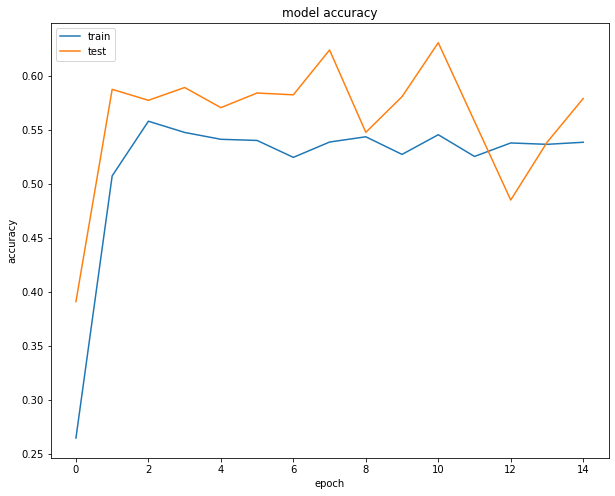

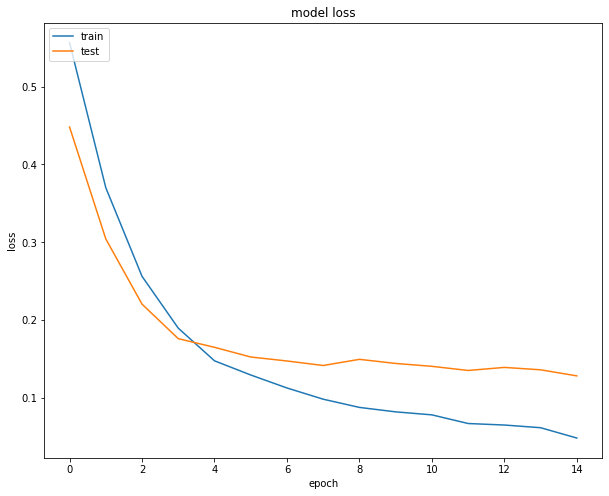

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [14]:
df_val = pd.read_csv('C:\\Users\\Raphael\\Downloads\\TIL_NLP_test_dataset.csv')
df_val.head(10)
X_val=df_val['word_representation'].values
print(type(X_val))

<class 'numpy.ndarray'>


In [15]:
#print(X_test[1])
#why fix num words
# tokenizer_val = Tokenizer(num_words=4250)
# tokenizer_val.fit_on_texts(mod_X)

mod_X = tokenizer.texts_to_sequences(mod_X)
X_val = tokenizer.texts_to_sequences(X_val)

# vocab_size_val = len(tokenizer_val.word_index) + 1
#what is max len
# maxlen_val = 30

mod_X = pad_sequences(mod_X, padding=padding, maxlen=maxlen, truncating = truncating)
X_val = pad_sequences(X_val, padding=padding, maxlen=maxlen, truncating = truncating)
print(mod_X[5:20])
print(type(mod_X[1]))

[[ 485  486  165  547    9   87  203    3  214  289  460  219    3 3711
  1250   11  677   38   43  104  604    0    0    0    0    0]
 [  32   27   10  148  826   28  905  139  762   46   94  314    8    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [ 163  425   79  411  412    3  413  405   14    1  397   64  398    5
   399    1  404   36   56    4   49  323  150   98 1049   17]
 [  25   78  426  103   10   31  939  940  869   15  250   29    4  379
  1059  901  182  176    0    0    0    0    0    0    0    0]
 [   3   33  125 1547 2676  100   36   20   22  249  171  450  516   38
   396  545    3  226   67    1   60   15  953  404   36   29]
 [ 747  768  828    9  118  388  161   19  179  728   54  129  688  323
  1000 3585   21   16   20    0    0    0    0    0    0    0]
 [ 943 2587   94   18   65   85    3  298  489   14  157   55  319  457
   124    6    0    0    0    0    0    0    0    0    0    0]
 [  43  377   67  183  957   24    7   64  853   21  82

In [16]:
# print(X_val[1])
# embeddings_dictionary2 = pd.read_pickle("word_embeddings.pkl")

# embedding_matrix2 = zeros((vocab_size, 100))
# for word, index in tokenizer2.word_index.items():
# #    if word in banlist:
# #        continue
#     embedding_vector = embeddings_dictionary2.get(word)
#     if embedding_vector is not None :
#         embedding_matrix[index] = embedding_vector
# print(type(embedding_matrix))
# print(len(embedding_matrix))

In [17]:
history = model.fit(mod_X, y, batch_size=160, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
20/20 [==============================] - 2s 94ms/step - loss: 0.0703 - acc: 0.5329 - val_loss: 0.0653 - val_acc: 0.5014
Epoch 2/10
20/20 [==============================] - 2s 88ms/step - loss: 0.0607 - acc: 0.5161 - val_loss: 0.0649 - val_acc: 0.5262
Epoch 3/10
20/20 [==============================] - 2s 90ms/step - loss: 0.0538 - acc: 0.5153 - val_loss: 0.0657 - val_acc: 0.5104
Epoch 4/10
20/20 [==============================] - 2s 87ms/step - loss: 0.0482 - acc: 0.5199 - val_loss: 0.0638 - val_acc: 0.5036
Epoch 5/10
20/20 [==============================] - 2s 86ms/step - loss: 0.0438 - acc: 0.5339 - val_loss: 0.0624 - val_acc: 0.5325
Epoch 6/10
20/20 [==============================] - 2s 87ms/step - loss: 0.0394 - acc: 0.5387 - val_loss: 0.0650 - val_acc: 0.5203
Epoch 7/10
20/20 [==============================] - 2s 87ms/step - loss: 0.0366 - acc: 0.5163 - val_loss: 0.0655 - val_acc: 0.5425
Epoch 8/10
20/20 [==============================] - 2s 86ms/step - loss: 0.0318 - a

In [18]:
preds_val = model.predict(X_val, verbose = 1)
preds_val[preds_val>=0.5] = 1
preds_val[preds_val<0.5] = 0

print(preds_val)
type(preds_val[1,1])

77/77 [==============================] - 0s 6ms/step
[[0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]


numpy.float32

In [19]:
preds_val_df=pd.DataFrame(data=preds_val, columns = ["outwear","top","trousers","women dresses","women skirts"])
preds_val_df.index.name = "id"

print(preds_val_df)
preds_val_df = preds_val_df.astype(int)
preds_val_df.dtypes

      outwear  top  trousers  women dresses  women skirts
id                                                       
0         0.0  1.0       1.0            0.0           0.0
1         1.0  1.0       0.0            0.0           0.0
2         1.0  0.0       1.0            0.0           0.0
3         0.0  1.0       1.0            0.0           0.0
4         0.0  1.0       1.0            0.0           0.0
...       ...  ...       ...            ...           ...
2455      0.0  0.0       1.0            1.0           0.0
2456      1.0  0.0       1.0            0.0           0.0
2457      1.0  0.0       1.0            0.0           0.0
2458      0.0  1.0       1.0            0.0           0.0
2459      0.0  0.0       1.0            0.0           1.0

[2460 rows x 5 columns]


outwear          int32
top              int32
trousers         int32
women dresses    int32
women skirts     int32
dtype: object

In [21]:
preds_val_df.to_csv("160input.csv")